In [1]:
import pandas as pd
import plotly.express as px 
import streamlit as st
import warnings
import numpy as np
warnings.filterwarnings('ignore')
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter
from bokeh.transform import factor_cmap
from bokeh.transform import linear_cmap
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from bokeh.palettes import Spectral10
from bokeh.transform import jitter

In [2]:
df = pd.read_csv("churn.csv", encoding = "ISO-8859-1")

In [3]:
df.head()

ExistingLost  Age Gender  Dependent    Education  Marital  \
0  Existing Customer   45      M          3  High School  Married   
1  Existing Customer   49      F          5     Graduate   Single   
2  Existing Customer   51      M          3     Graduate  Married   
3  Existing Customer   40      M          3   Uneducated  Married   
4  Existing Customer   44      M          2     Graduate  Married   

           Income CardCat  PeriodOfRelationship  TotalNumberProducts  \
0     $60K - $80K    Blue                    39                    5   
1  Less than $40K    Blue                    44                    6   
2    $80K - $120K    Blue                    36                    4   
3     $60K - $80K    Blue                    21                    5   
4     $40K - $60K    Blue                    36                    3   

   MonthsInactive  ContactsCount  CreditLimit  TotalBal  AvgOpenToBuy  \
0               1              3      12691.0       777       11914.0   
1               1              2       8256.0       864        7392.0   
2               1              0       3418.0         0        3418.0   
3               1              0       4716.0         0        4716.0   
4               1              2       4010.0      1247        2763.0   

   ChangeTransAmountQ4Q1  TotalTransAmt  TotalTransCountQ4Q1  \
0                  1.335           1144                   42   
1                  1.541           1291                   33   
2                  2.594           1887                   20   
3                  2.175            816                   28   
4                  1.376           1088                   24   

   ChangeTransCountQ4Q1  UtilRatio  
0                 1.625      0.061  
1                 3.714      0.105  
2                 2.333      0.000  
3                 2.500      0.000  
4                 0.846      0.311

In [4]:
df.describe()

Age    Dependent  PeriodOfRelationship  TotalNumberProducts  \
count  7081.000000  7081.000000           7081.000000          7081.000000   
mean     46.347691     2.337805             35.981359             3.819376   
std       8.041225     1.291649              8.002609             1.544444   
min      26.000000     0.000000             13.000000             1.000000   
25%      41.000000     1.000000             31.000000             3.000000   
50%      46.000000     2.000000             36.000000             4.000000   
75%      52.000000     3.000000             40.000000             5.000000   
max      73.000000     5.000000             56.000000             6.000000   

       MonthsInactive  ContactsCount   CreditLimit     TotalBal  AvgOpenToBuy  \
count     7081.000000    7081.000000   7081.000000  7081.000000   7081.000000   
mean         2.342607       2.454456   8492.773831  1167.501624   7325.272207   
std          0.995104       1.104917   9126.072520   812.315606   9131.217585   
min          0.000000       0.000000   1438.300000     0.000000      3.000000   
25%          2.000000       2.000000   2498.000000   463.000000   1248.000000   
50%          2.000000       2.000000   4287.000000  1282.000000   3250.000000   
75%          3.000000       3.000000  10729.000000  1781.000000   9491.000000   
max          6.000000       6.000000  34516.000000  2517.000000  34516.000000   

       ChangeTransAmountQ4Q1  TotalTransAmt  TotalTransCountQ4Q1  \
count            7081.000000    7081.000000          7081.000000   
mean                0.760584    4394.299816            64.503319   
std                 0.223139    3468.461606            23.809330   
min                 0.000000     510.000000            10.000000   
25%                 0.629000    2089.000000            44.000000   
50%                 0.735000    3831.000000            67.000000   
75%                 0.858000    4740.000000            80.000000   
max                 3.397000   17995.000000           134.000000   

       ChangeTransCountQ4Q1    UtilRatio  
count           7081.000000  7081.000000  
mean               0.711508     0.282313  
std                0.238693     0.278731  
min                0.000000     0.000000  
25%                0.583000     0.026000  
50%                0.700000     0.186000  
75%                0.818000     0.515000  
max                3.714000     0.999000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ExistingLost           7081 non-null   object 
 1   Age                    7081 non-null   int64  
 2   Gender                 7081 non-null   object 
 3   Dependent              7081 non-null   int64  
 4   Education              7081 non-null   object 
 5   Marital                7081 non-null   object 
 6   Income                 7081 non-null   object 
 7   CardCat                7081 non-null   object 
 8   PeriodOfRelationship   7081 non-null   int64  
 9   TotalNumberProducts    7081 non-null   int64  
 10  MonthsInactive         7081 non-null   int64  
 11  ContactsCount          7081 non-null   int64  
 12  CreditLimit            7081 non-null   float64
 13  TotalBal               7081 non-null   int64  
 14  AvgOpenToBuy           7081 non-null   float64
 15  Chan

In [6]:
st.set_page_config(page_title = "Churning customers", page_icon = ":credit_card:", layout = "wide")

In [7]:
st.title(":credit_card: Credit Card Churning Customers Analysis")
st.markdown('<style>div.block-container{padding-top:1rem;}</style>', unsafe_allow_html=True)

2023-11-20 01:05:52.557 
  command:

    streamlit run /Users/annageorgieva/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [8]:
fl = st.file_uploader(":file_folder: Upload a file", type=(["csv", "txt", "xlsx", "xls"]))
if fl is not None:
    filename = fl.name
    st.write(filename)
    df = pd.read_csv(filename, encoding = "ISO-8859-1")
else:
    df = pd.read_csv("churn.csv", encoding = "ISO-8859-1")

In [9]:
# Convert 'ExistingLost' to a numeric value: for example, 'Existing Customer' to 1, and 'Lost' to 0
df['CurrentChurned'] = df['ExistingLost'].apply(lambda x: 1 if x == 'Existing Customer' else 0)

# Now include this new numeric column in your correlation matrix calculation
corr_matrix = df[['CurrentChurned', 'Age', 'PeriodOfRelationship', 'TotalNumberProducts', 'MonthsInactive', 
                  'ContactsCount', 'CreditLimit', 'TotalBal', 'AvgOpenToBuy', 
                  'ChangeTransAmountQ4Q1', 'TotalTransAmt', 'TotalTransCountQ4Q1', 
                  'ChangeTransCountQ4Q1', 'UtilRatio']].corr()

# Custom color scale
color_scale = [
    [0, '#A579FF'],  
    [1, '#5E18EB']   
]

# Generate the heatmap
fig = px.imshow(corr_matrix, 
                x=corr_matrix.columns, 
                y=corr_matrix.columns, 
                color_continuous_scale=color_scale,
                text_auto=True, 
                aspect="auto")

fig.update_layout(coloraxis_colorbar=dict(
    title='Correlation',
    tickvals=[-1, 1], 
    ticktext=['Minimum', 'Maximum'],
    lenmode='fraction', 
    len=1
))

# Create columns with a custom layout, including 'spacer' columns
col1, col2, spacer, col3 = st.columns([2, 3, 1.05, 3])

with col2:
    # Custom HTML for the title with larger font size and bold text
    st.markdown("""
    <style>
    .title {
        font-size: small; 
        font-weight: bold;
    }
    </style>
    <div class="title">Correlation Matrix of Credit Card Customer Attributes</div>
    """, unsafe_allow_html=True)
    
    st.plotly_chart(fig)

In [10]:
# Convert 'MonthsInactive' to string if treating as categorical
df['MonthsInactive'] = df['MonthsInactive'].astype(str)

# Manually create a jitter effect
df['JitteredMonthsInactive'] = df['MonthsInactive'].apply(lambda x: float(x) + np.random.uniform(-0.3, 0.3))

# Create the Plotly scatter plot
fig = px.scatter(df, 
                 x='PeriodOfRelationship', 
                 y='JitteredMonthsInactive', 
                 color='ExistingLost',
                 labels={'JitteredMonthsInactive': 'Months Inactive'},
                 title="Customer Relationship Analysis",
                 color_discrete_sequence=['#A579FF', '#5E18EB'])

# Customize the hover data
fig.update_traces(hovertemplate="Churn Status: %{color}<br>Period of Relationship: %{x}<br>Months Inactive: %{y}")
fig.update_layout(title_text='')

# Customize the layout
fig.update_layout(legend_title_text='Churn Status')

with col3:
    # Custom HTML for the title with larger font size and bold text
    st.markdown("""
    <style>
    .title {
        font-size: small; 
        font-weight: bold;
    }
    </style>
    <div class="title">Customer relationship analysis</div>
    """, unsafe_allow_html=True)
    
    st.plotly_chart(fig)

In [11]:
# Define categories and corresponding colors
categories = ['Attrited Customer', 'Existing Customer']
category_colors = ['#5E18EB', '#A579FF']
color_mapping = {'Attrited Customer': category_colors[0], 'Existing Customer': category_colors[1]}

# Plot the histogram with LoanAmount on the x-axis and stacked Loan_Status
fig = px.histogram(df,
                   x="CardCat",
                   color="ExistingLost",
                   color_discrete_map=color_mapping,
                   barmode='stack',
                   labels={'CartCat': 'Card Category'},
                   text_auto=True)

# Update layout for centering the title and adjusting y-axis title
fig.update_layout(title_x=0.5, yaxis_title='Count')
fig.update_layout(title_text='')
    
with col2:

    # Custom HTML for the title of the new chart
    st.markdown("""
    <style>
    .title {
        font-size: small; 
        font-weight: bold;
    }
    </style>
    <div class="title">Stacked Distribution of Churned and Existing Customers by Card Category</div>
    """, unsafe_allow_html=True)
    
    # Display the new histogram chart
    st.plotly_chart(fig)

In [12]:
new_df = df.drop(['CurrentChurned', 'JitteredMonthsInactive'], axis=1)

In [13]:
le = LabelEncoder()
categoricalfeatures = ['ExistingLost']
for col in new_df[categoricalfeatures]:
    new_df[col]=le.fit_transform(new_df[col])

In [14]:
import dalex as dx

X = new_df.drop(columns='ExistingLost')
y = new_df.ExistingLost

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# Selecting numerical and categorical columns
numericalCols = X.select_dtypes(exclude=['object']).columns.tolist()
categoricalCols = X.select_dtypes(include=['object']).columns.tolist()

# Pipelines for numerical and categorical data
num_pipe = make_pipeline(SimpleImputer(strategy='mean'), 
                         StandardScaler())

cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='N/A'),
                        OneHotEncoder(handle_unknown='ignore', sparse=False))

# Reduced parameter grid
parameters = {'randomforestclassifier__n_estimators': [100, 200],
              'randomforestclassifier__max_depth': [3, 6],
              'randomforestclassifier__criterion': ['gini'],
              'randomforestclassifier__max_features': ['sqrt'],
              'randomforestclassifier__bootstrap': [True]}

# Reduced cross-validation folds and a smaller n_iter for RandomizedSearchCV
pipe = RandomizedSearchCV(make_pipeline(ColumnTransformer([('categorical', cat_pipe, categoricalCols),
                                                          ('numerical', num_pipe, numericalCols)]),
                                        RandomForestClassifier()),
                          parameters, n_iter=5, cv=3).fit(X, y)

print('Cross Validation Score: {:.2f}%'.format(pipe.best_score_ * 100))

Cross Validation Score: 85.19%


In [16]:
pipe.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

array([6.15370940e-03, 5.27129782e-03, 3.73562570e-04, 7.03587117e-04,
       5.32278155e-04, 5.12981234e-04, 4.34935950e-04, 6.09626336e-04,
       3.79795086e-04, 2.79357922e-03, 2.07501875e-03, 5.17652630e-04,
       5.20490070e-04, 6.11335141e-04, 5.88536803e-04, 1.59040749e-03,
       5.99333550e-04, 6.71110814e-04, 2.63424782e-04, 4.13053289e-04,
       4.20370273e-04, 2.26167702e-02, 1.17858548e-03, 4.58156923e-03,
       2.97069000e-03, 1.98410889e-04, 1.76765489e-04, 1.39859666e-02,
       3.93170775e-03, 8.59988039e-03, 6.96647058e-02, 2.44071333e-02,
       2.28196223e-02, 1.46682173e-01, 1.67813995e-02, 5.14702842e-02,
       1.67391519e-01, 1.97849929e-01, 1.22123194e-01, 9.65336079e-02])

In [17]:
import shap

In [18]:
shap.initjs() 

In [19]:
Xexp=ColumnTransformer([('categorical', cat_pipe, categoricalCols),
                                    ('numerical', num_pipe, numericalCols)]).fit_transform(X)

In [20]:
explainer = shap.Explainer(pipe.best_estimator_.named_steps['randomforestclassifier'], algorithm='tree') 
shap_values = explainer(Xexp) 

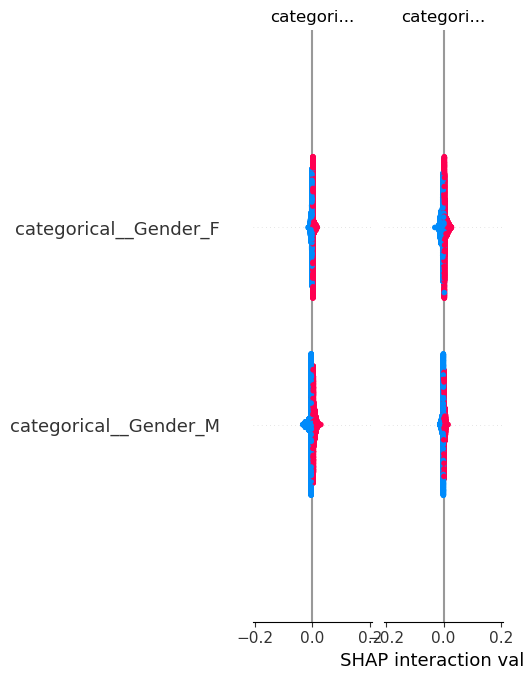

In [21]:
shap.summary_plot(shap_values, Xexp, plot_type='bar',
    feature_names=pipe.best_estimator_.named_steps.columntransformer.get_feature_names_out());

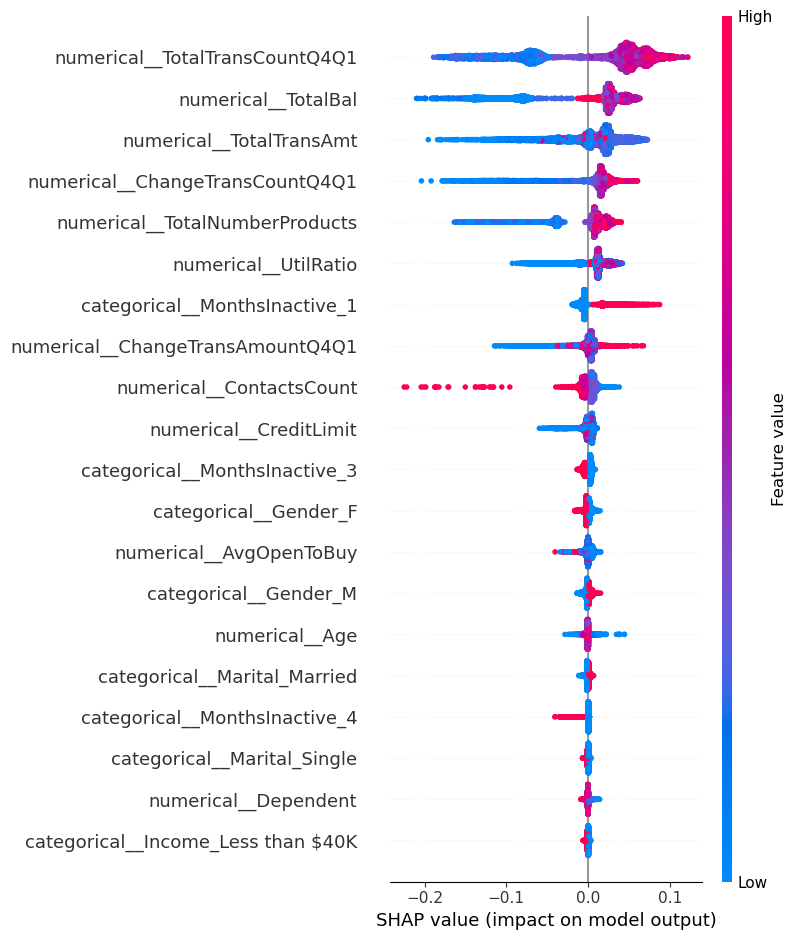

In [22]:
explainer = shap.TreeExplainer(pipe.best_estimator_.named_steps['randomforestclassifier'])
shap_values = explainer.shap_values(Xexp, approximate=False, check_additivity=False)

shap.summary_plot(shap_values[1], Xexp, 
            feature_names=pipe.best_estimator_.named_steps.columntransformer.get_feature_names_out())

In [23]:
import matplotlib.pyplot as plt
def make_shap_waterfall_plot(shap_values, features, num_display=20):
    column_list = pipe.best_estimator_.named_steps.columntransformer.get_feature_names_out()
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))

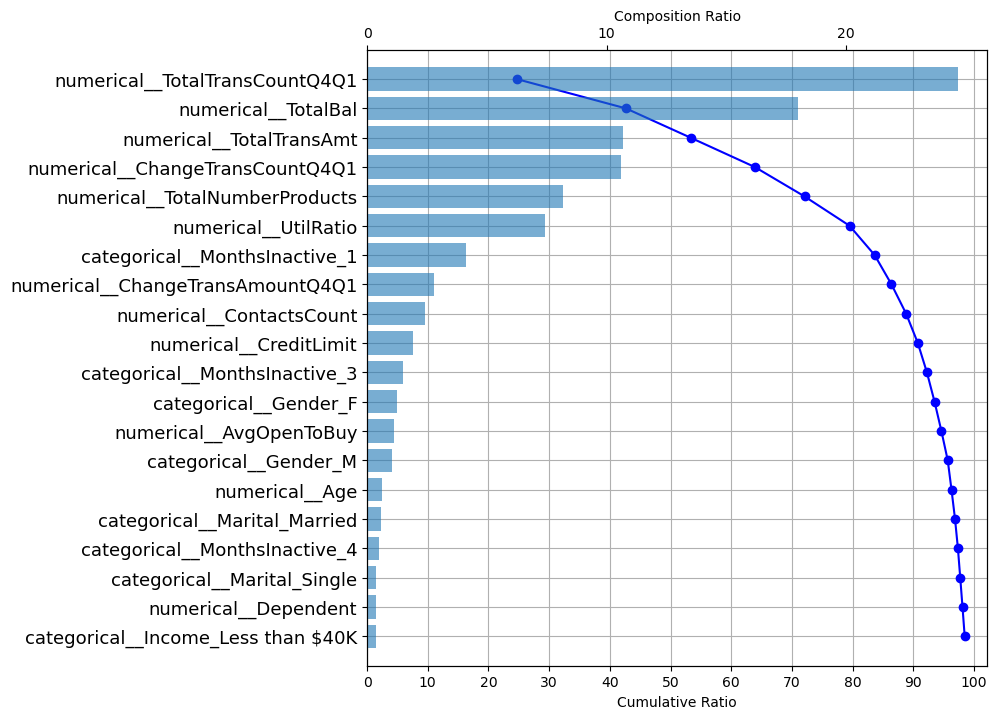

In [24]:
# Shapp waterfall plot
make_shap_waterfall_plot(shap_values[1], Xexp)

In [25]:
Xdata = pd.DataFrame(Xexp)
Xdata.columns = pipe.best_estimator_.named_steps.columntransformer.get_feature_names_out()
Xdata

categorical__Gender_F  categorical__Gender_M  \
0                       0.0                    1.0   
1                       1.0                    0.0   
2                       0.0                    1.0   
3                       0.0                    1.0   
4                       0.0                    1.0   
...                     ...                    ...   
7076                    0.0                    1.0   
7077                    1.0                    0.0   
7078                    0.0                    1.0   
7079                    1.0                    0.0   
7080                    1.0                    0.0   

      categorical__Education_College  categorical__Education_Doctorate  \
0                                0.0                               0.0   
1                                0.0                               0.0   
2                                0.0                               0.0   
3                                0.0                               0.0   
4                                0.0                               0.0   
...                              ...                               ...   
7076                             0.0                               0.0   
7077                             0.0                               0.0   
7078                             0.0                               0.0   
7079                             0.0                               0.0   
7080                             0.0                               0.0   

      categorical__Education_Graduate  categorical__Education_High School  \
0                                 0.0                                 1.0   
1                                 1.0                                 0.0   
2                                 1.0                                 0.0   
3                                 0.0                                 0.0   
4                                 1.0                                 0.0   
...                               ...                                 ...   
7076                              0.0                                 1.0   
7077                              1.0                                 0.0   
7078                              1.0                                 0.0   
7079                              0.0                                 1.0   
7080                              1.0                                 0.0   

      categorical__Education_Post-Graduate  categorical__Education_Uneducated  \
0                                      0.0                                0.0   
1                                      0.0                                0.0   
2                                      0.0                                0.0   
3                                      0.0                                1.0   
4                                      0.0                                0.0   
...                                    ...                                ...   
7076                                   0.0                                0.0   
7077                                   0.0                                0.0   
7078                                   0.0                                0.0   
7079                                   0.0                                0.0   
7080                                   0.0                                0.0   

      categorical__Marital_Divorced  categorical__Marital_Married  ...  \
0                               0.0                           1.0  ...   
1                               0.0                           0.0  ...   
2                               0.0                           1.0  ...   
3                               0.0                           1.0  ...   
4                               0.0                           1.0  ...   
...                             ...                           ...  ...   
7076                            0.0                 

In [26]:
feature_list = pipe.best_estimator_.named_steps.columntransformer.get_feature_names_out()
top_features = ['numerical__ChangeTransCountQ4Q1', 'numerical__TotalBal', 'numerical__TotalTransCountQ4Q1']

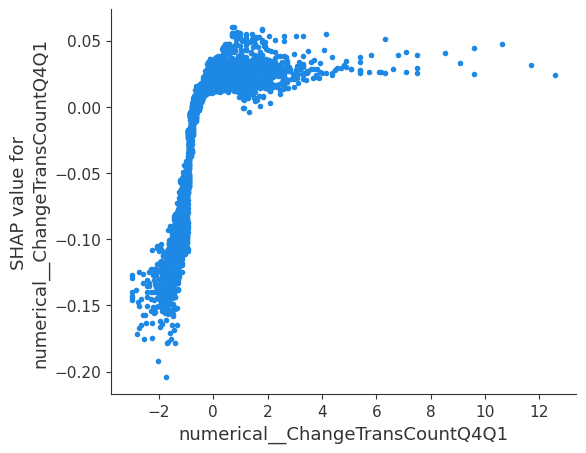

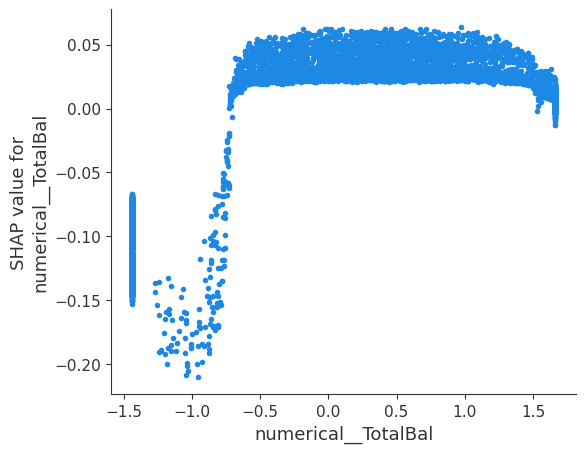

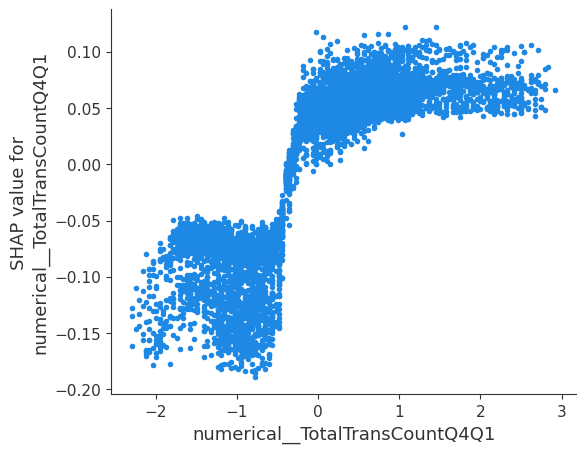

In [27]:
for feature in top_features:
    shap.dependence_plot(feature, shap_values[1], Xdata, interaction_index=None)

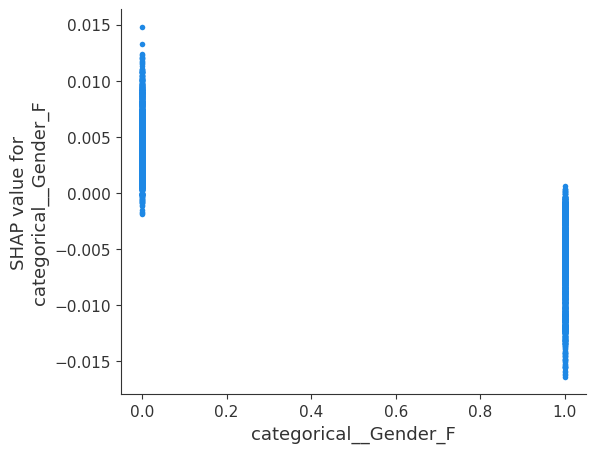

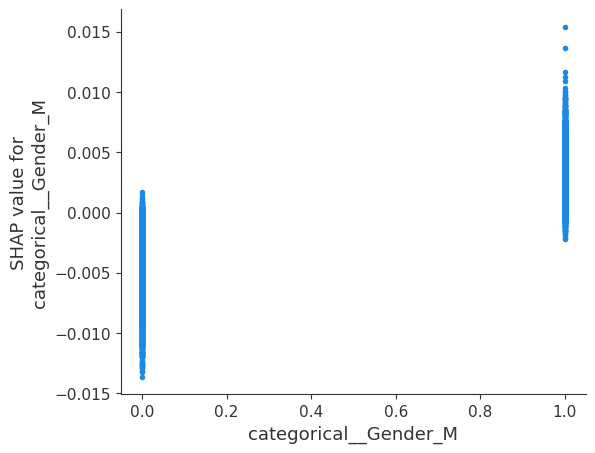

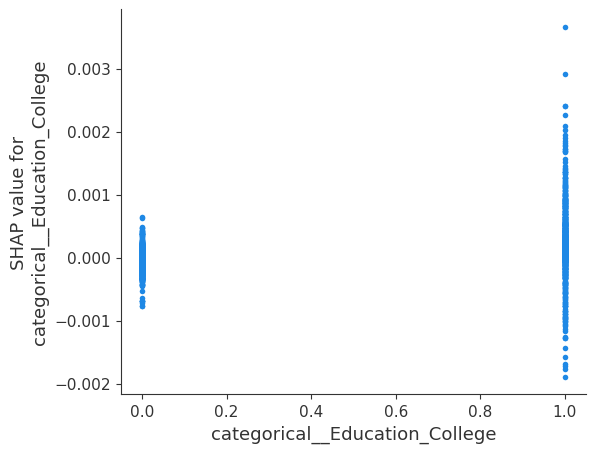

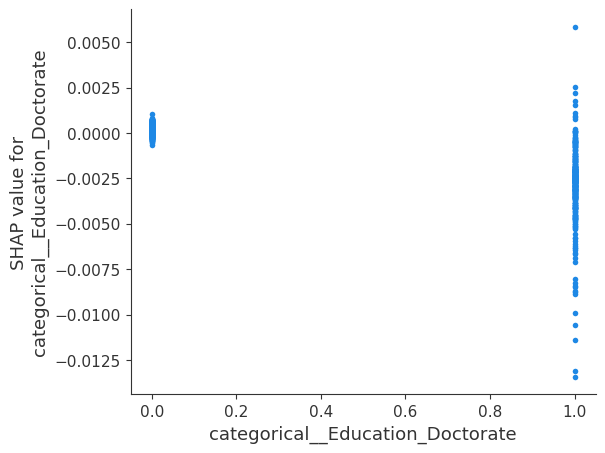

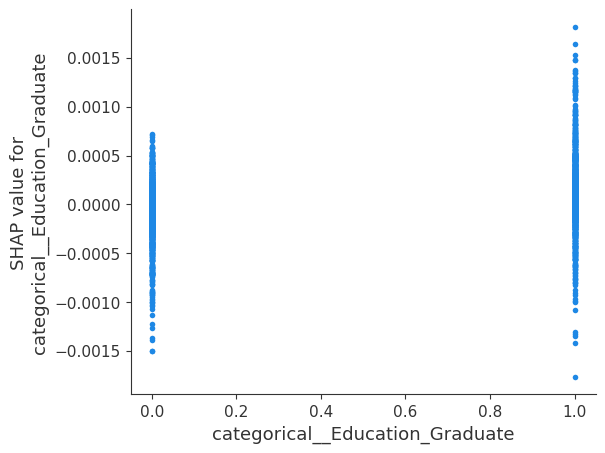

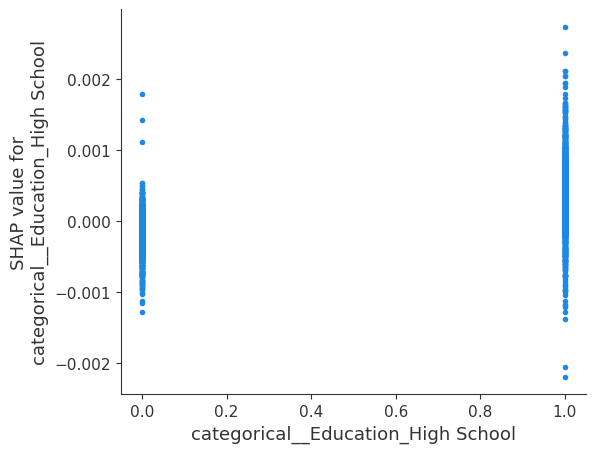

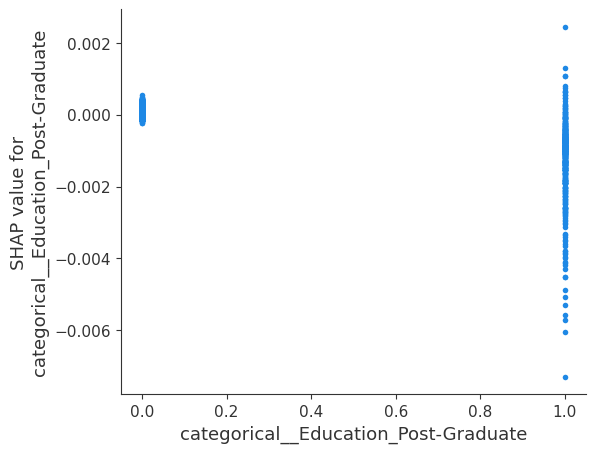

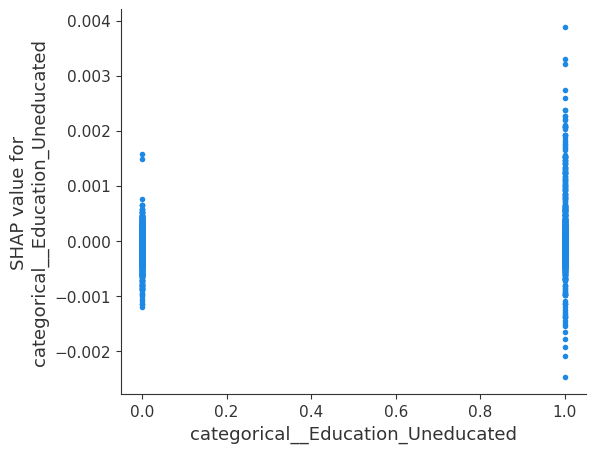

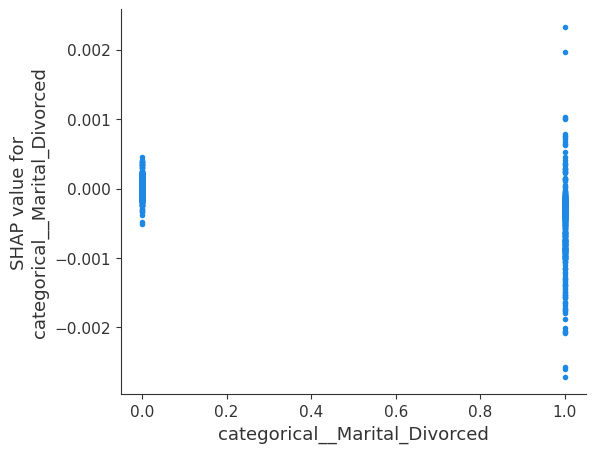

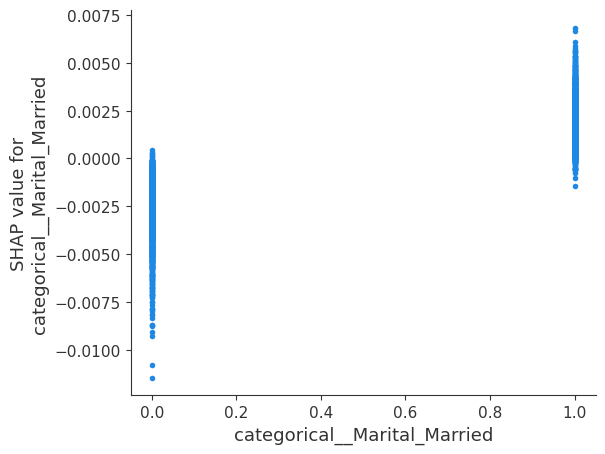

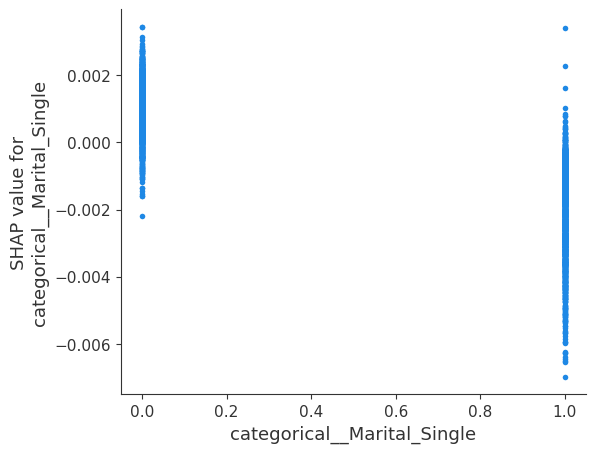

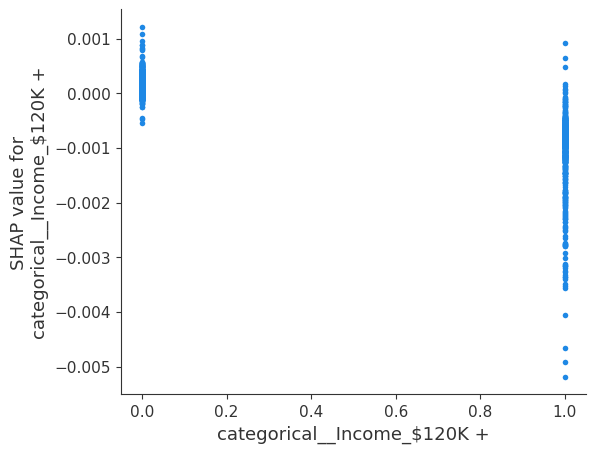

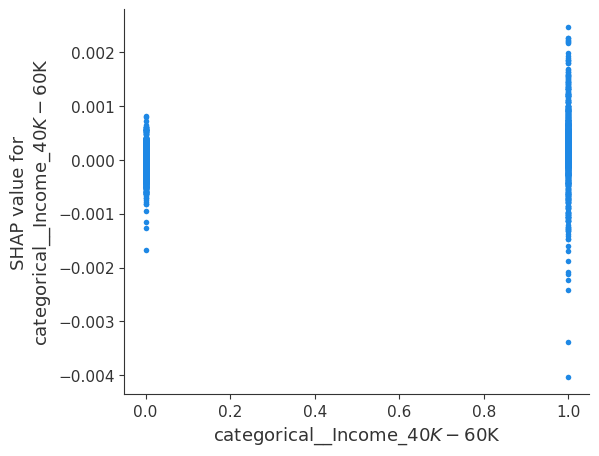

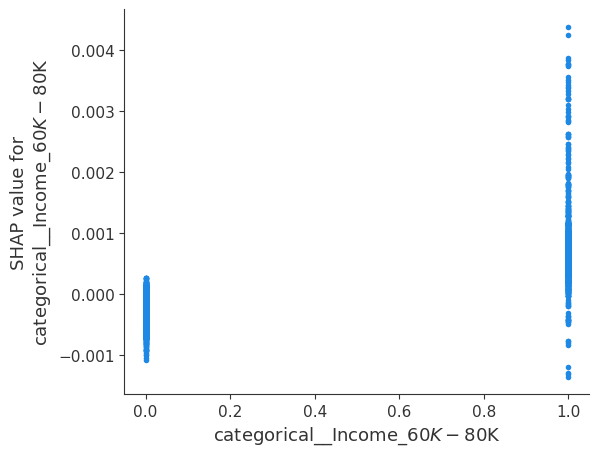

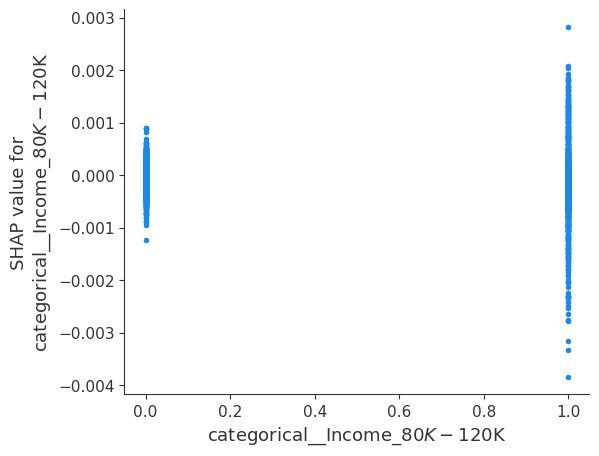

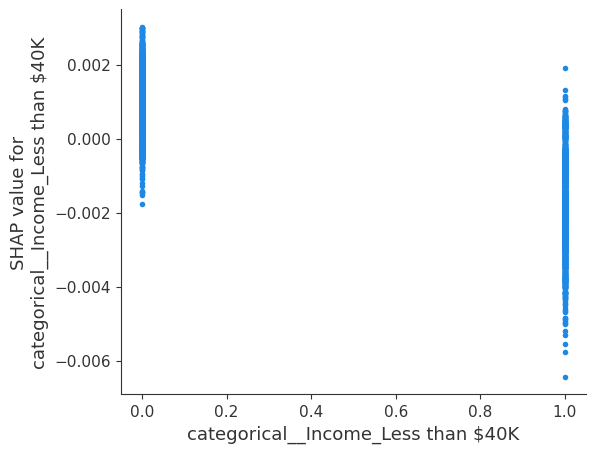

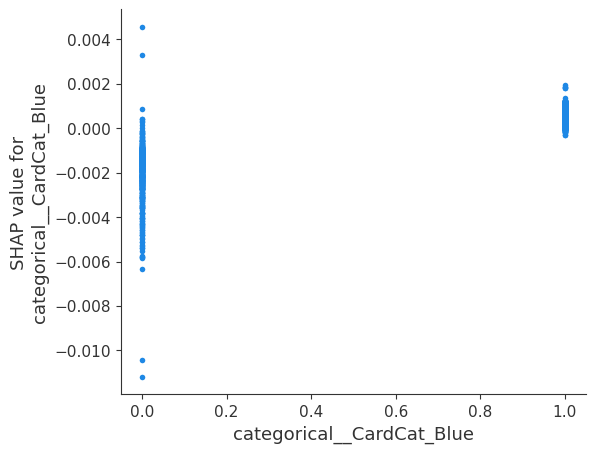

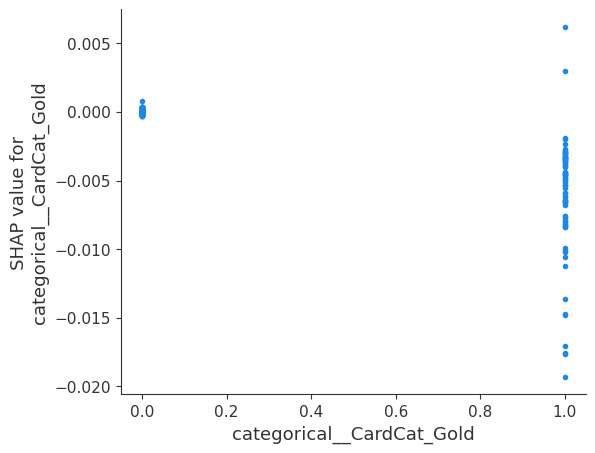

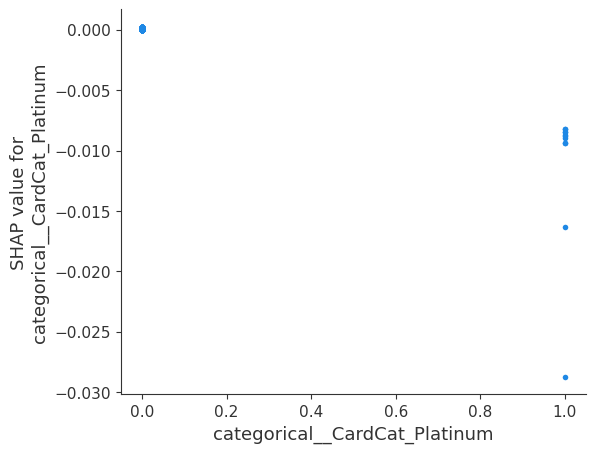

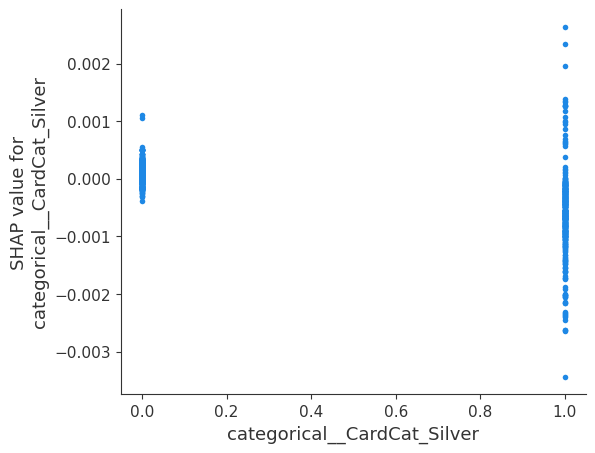

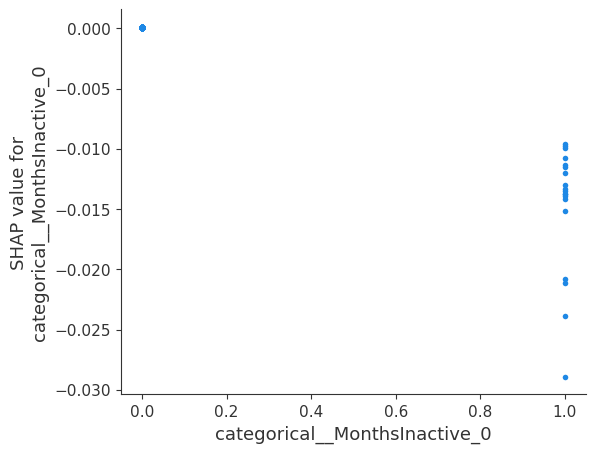

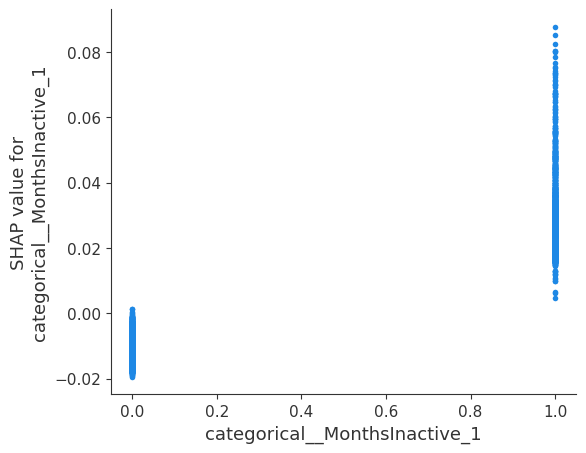

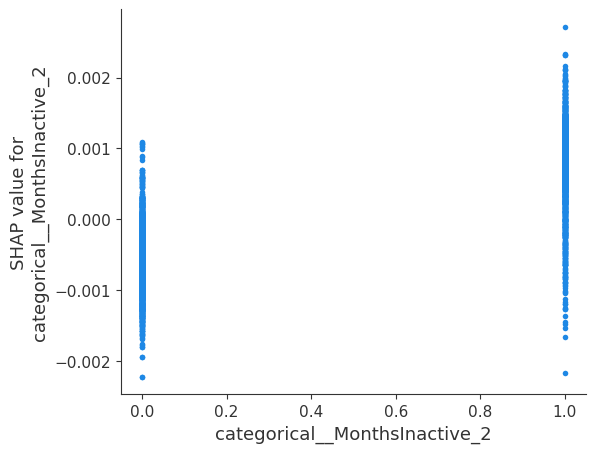

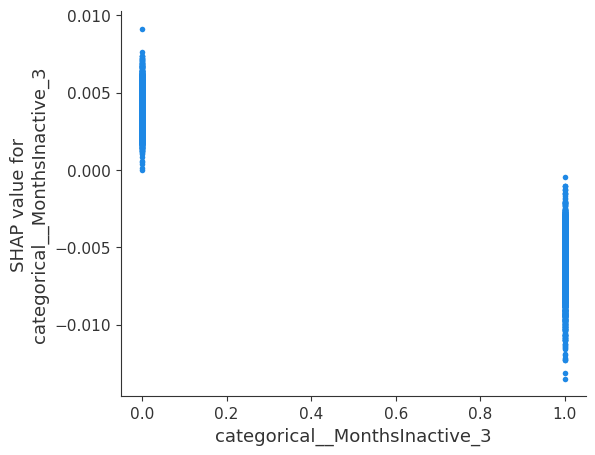

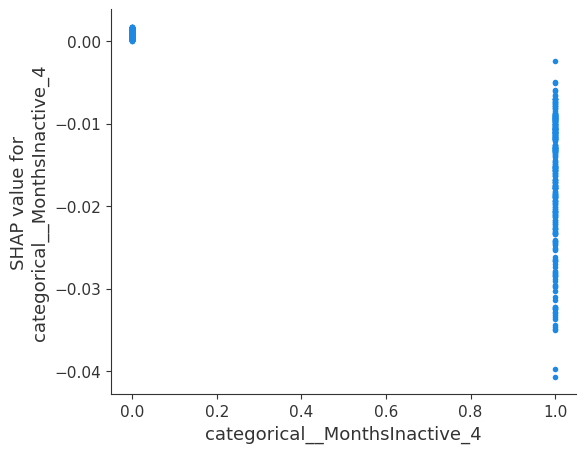

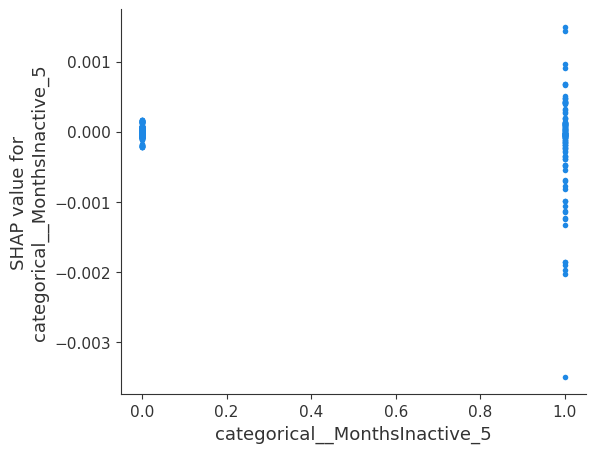

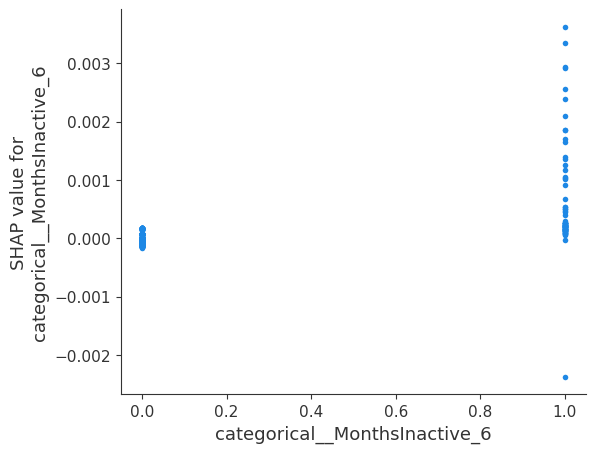

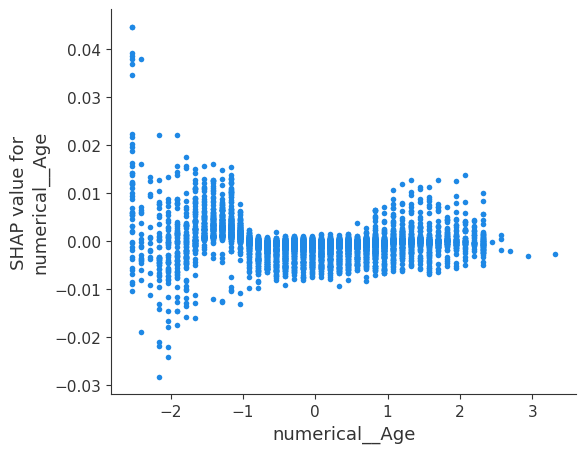

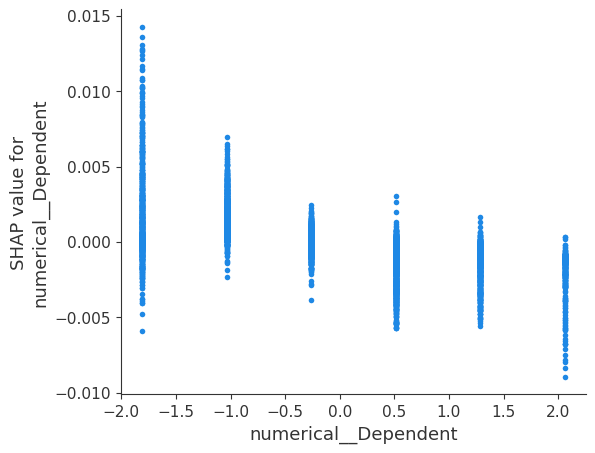

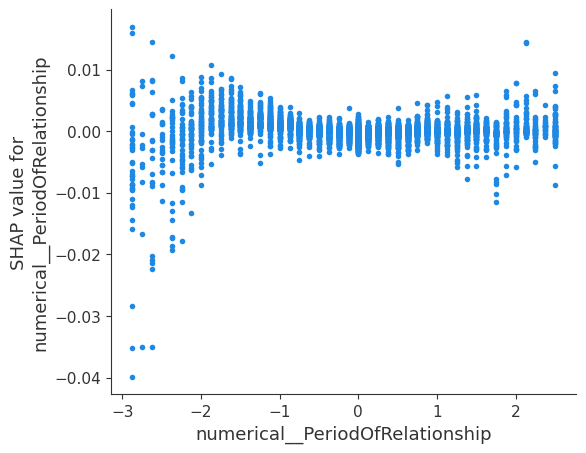

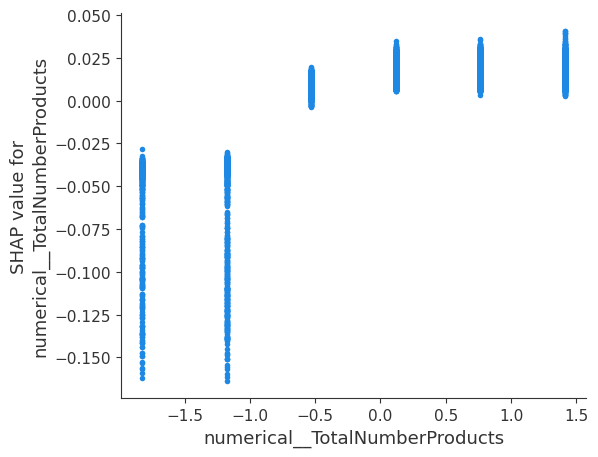

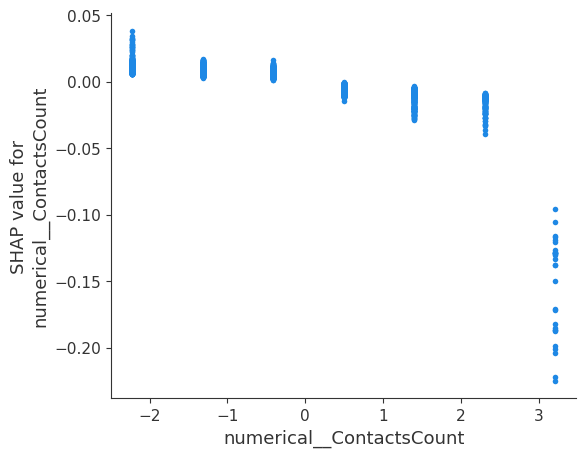

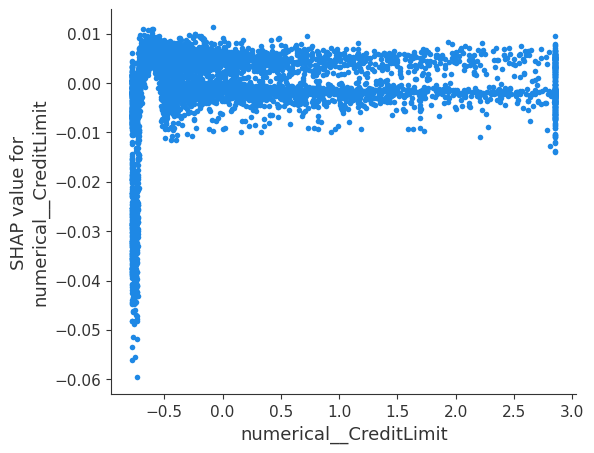

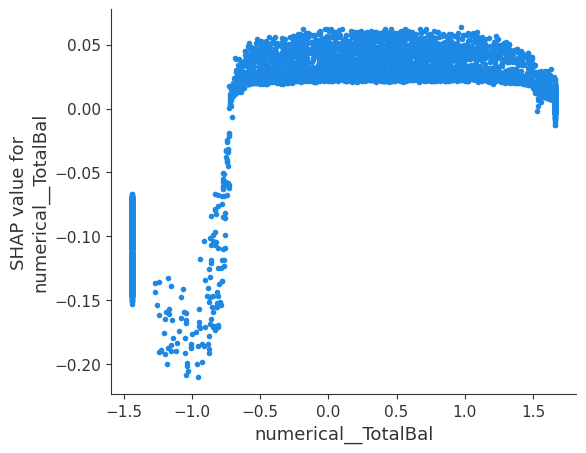

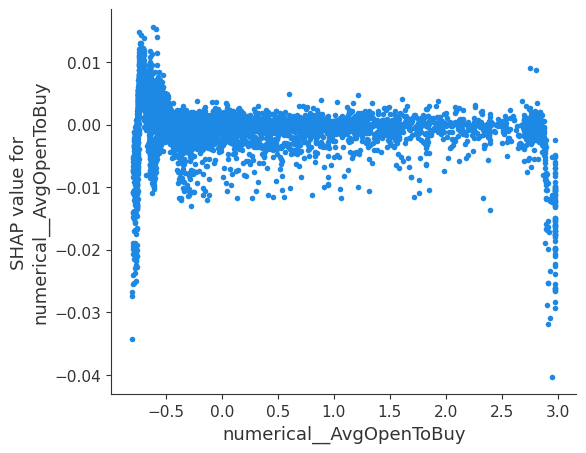

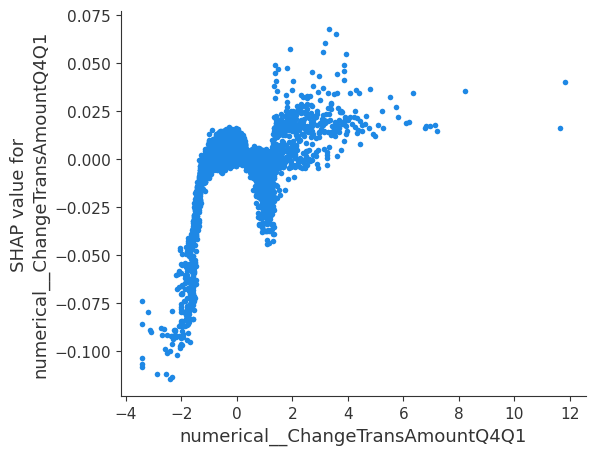

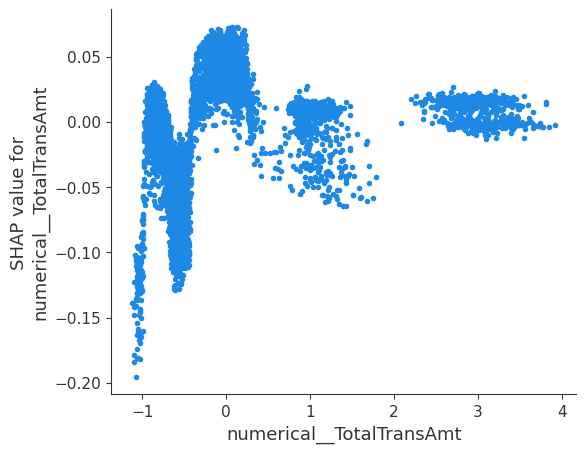

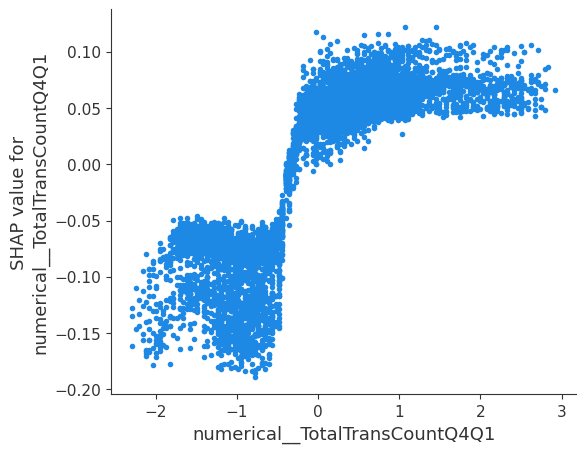

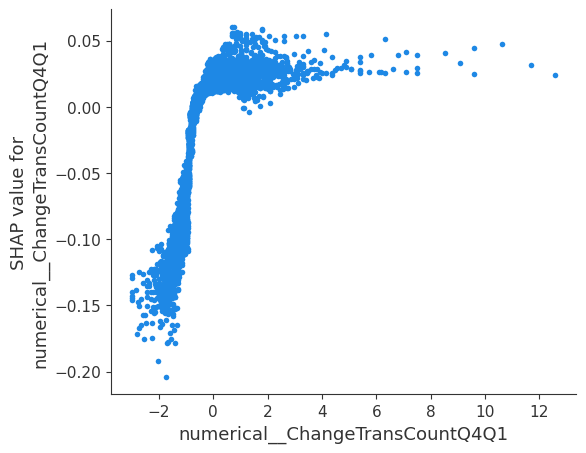

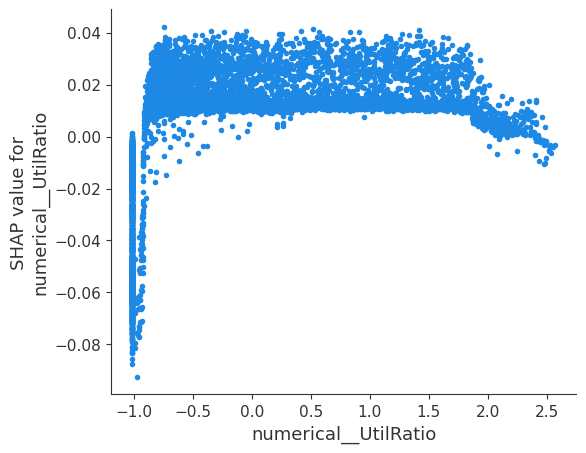

In [28]:
for feature in feature_list:
    shap.dependence_plot(feature, shap_values[1], Xdata, interaction_index=None)

In [29]:
explainer = shap.TreeExplainer(pipe.best_estimator_.named_steps['randomforestclassifier'])
shap_values = explainer.shap_values(Xdata)
expected_value = explainer.expected_value

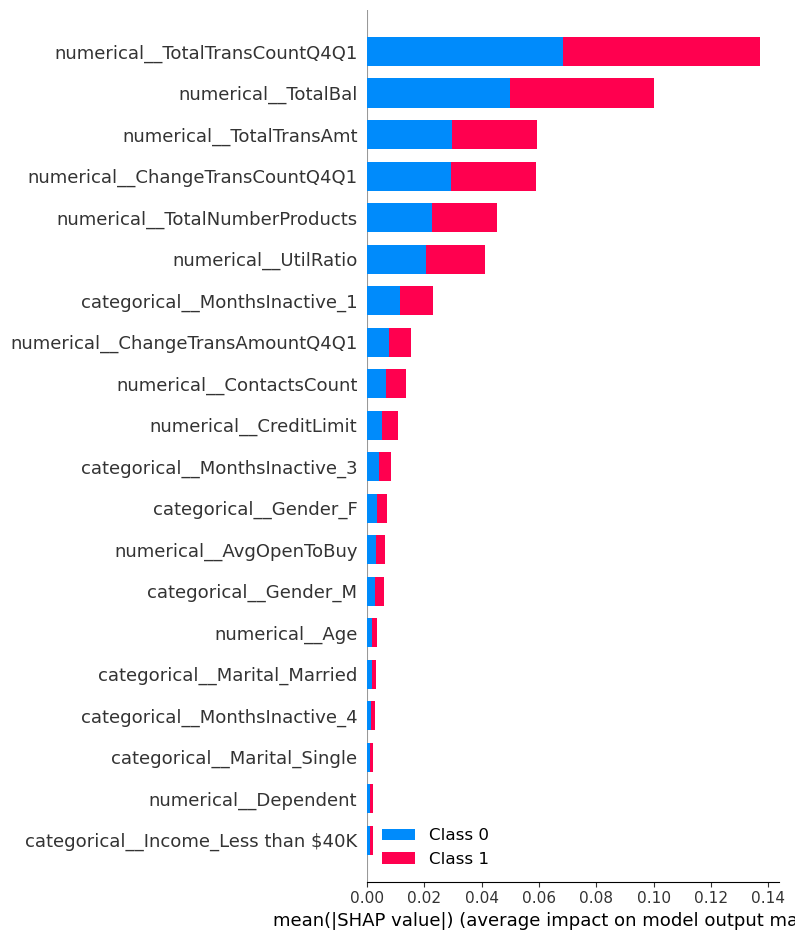

In [30]:
# Generate summary dot plot
shap.summary_plot(shap_values, Xdata,title="SHAP summary plot") 

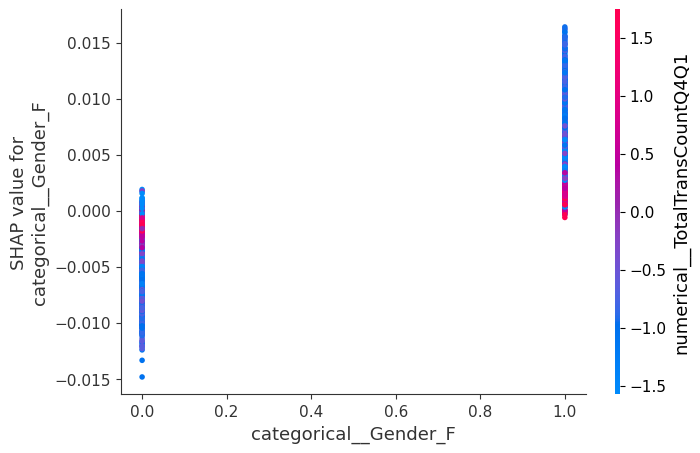

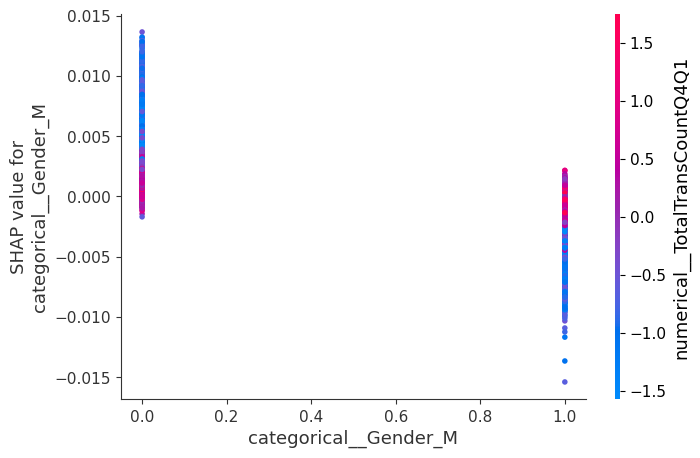

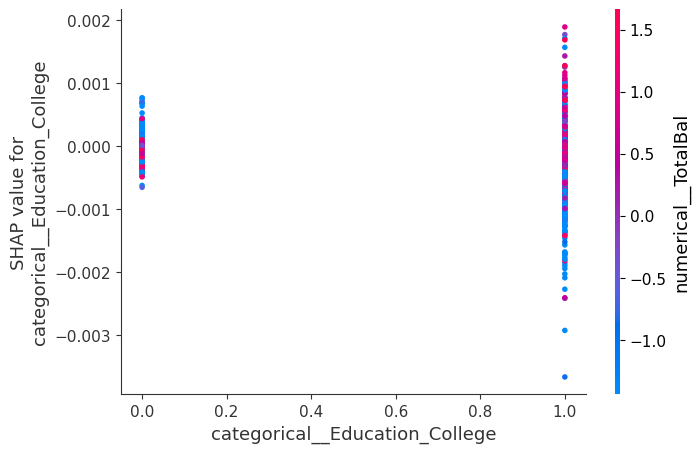

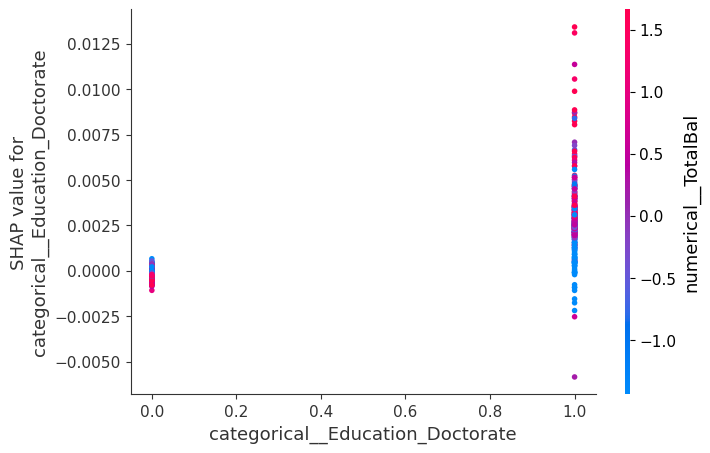

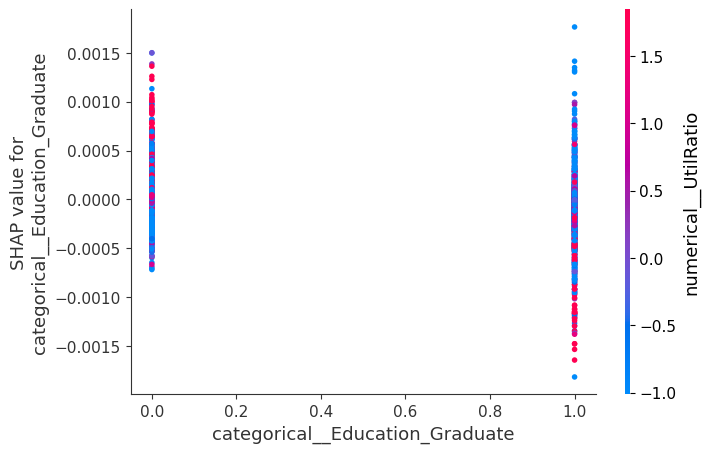

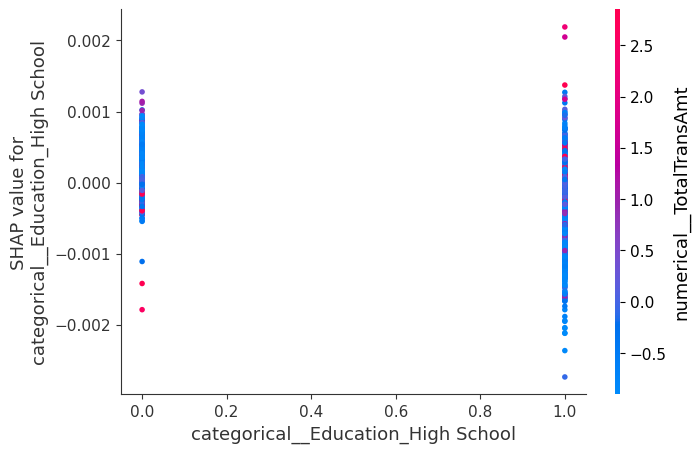

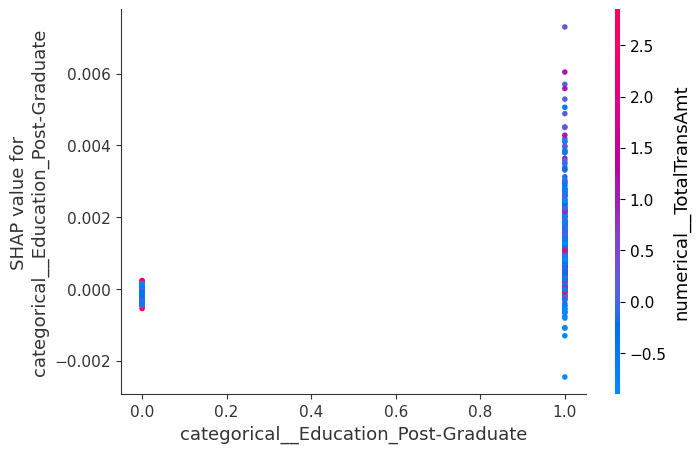

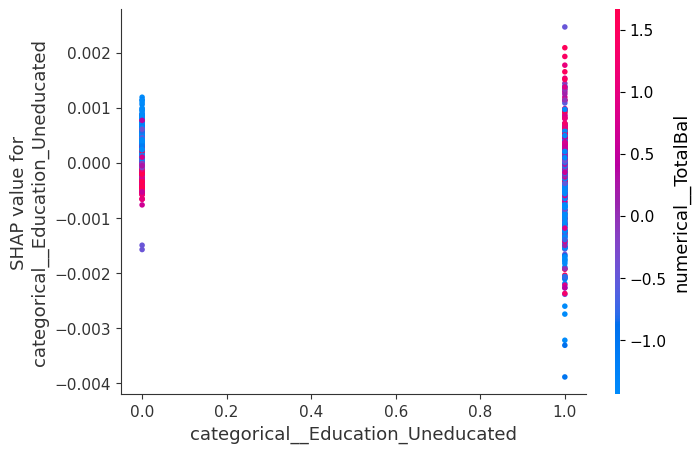

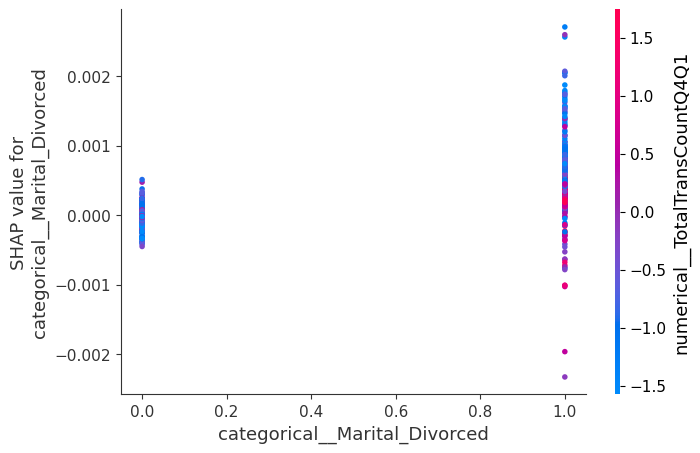

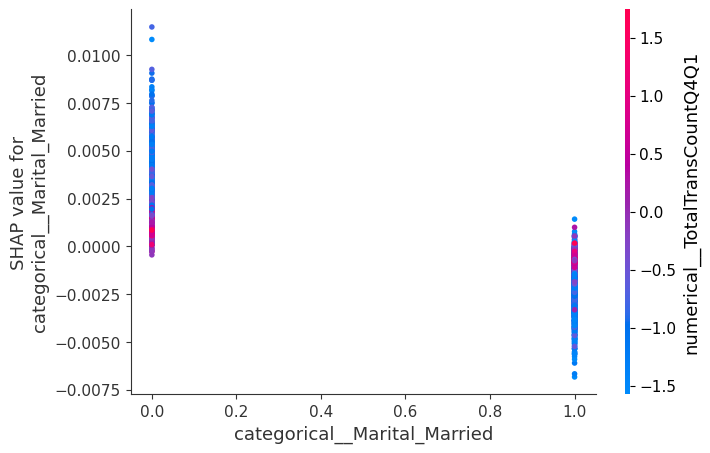

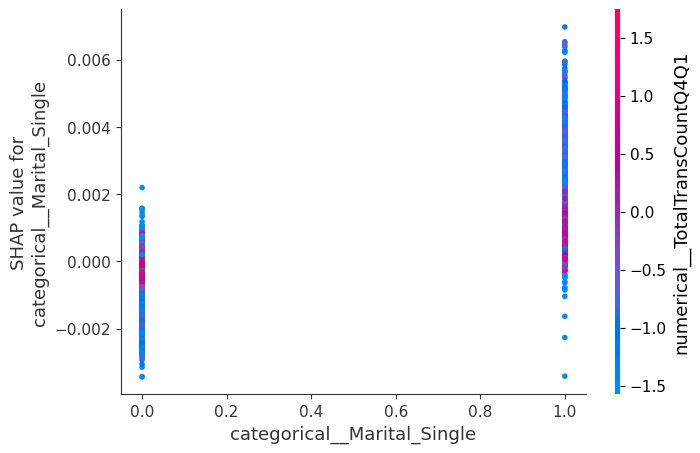

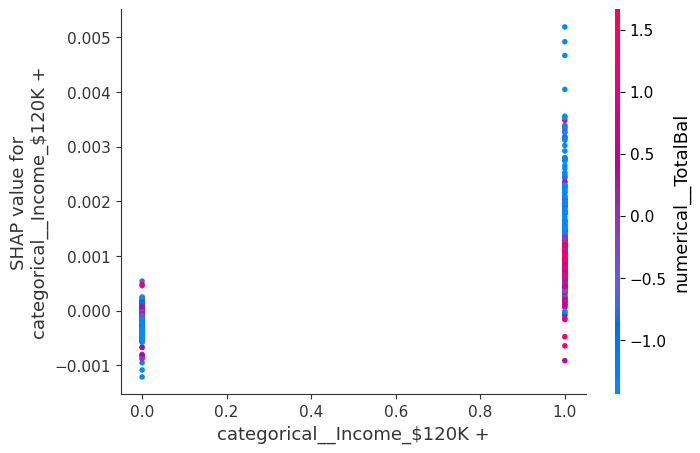

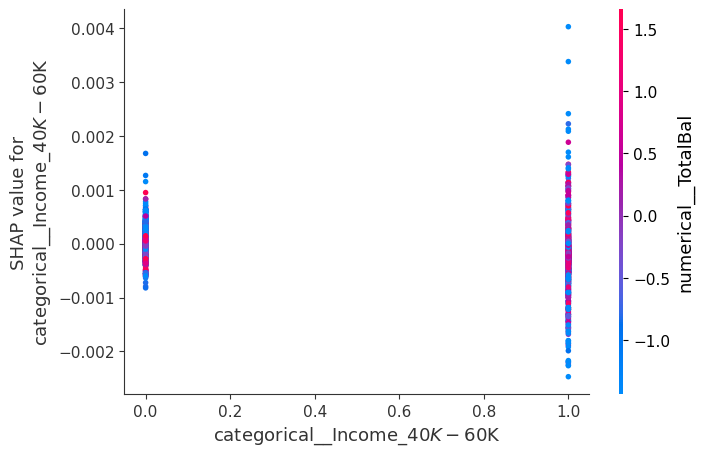

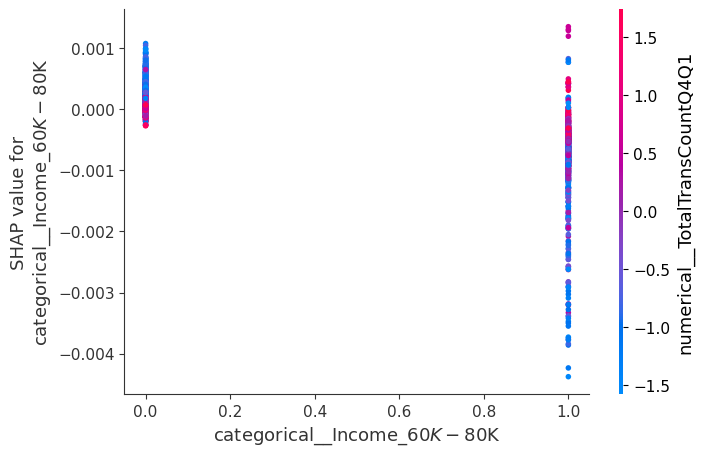

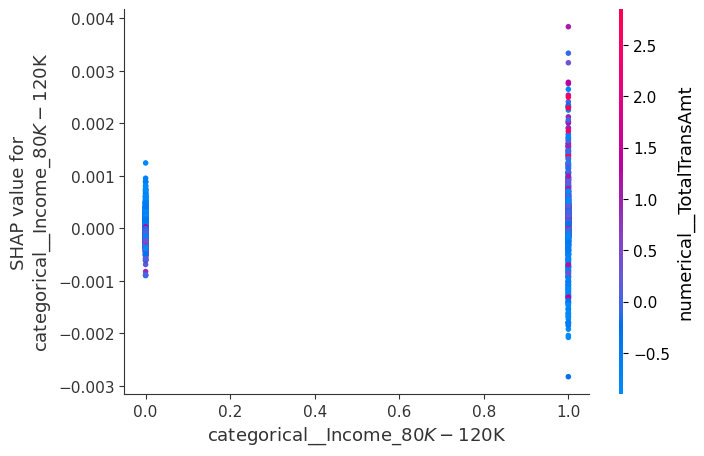

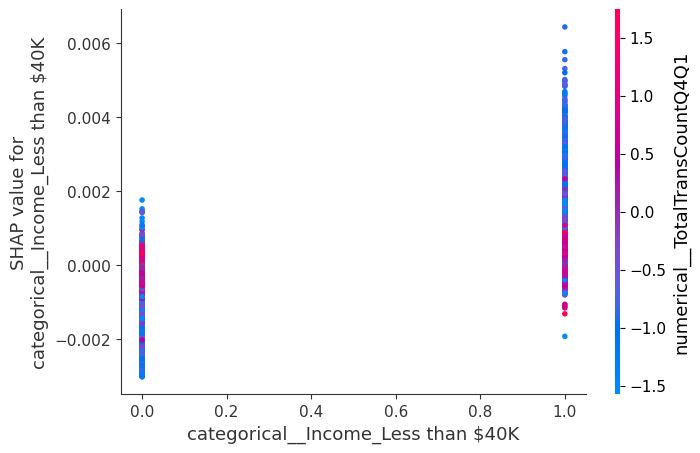

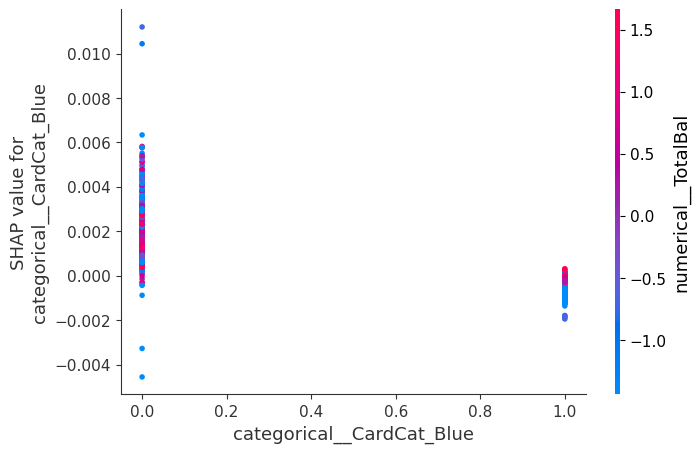

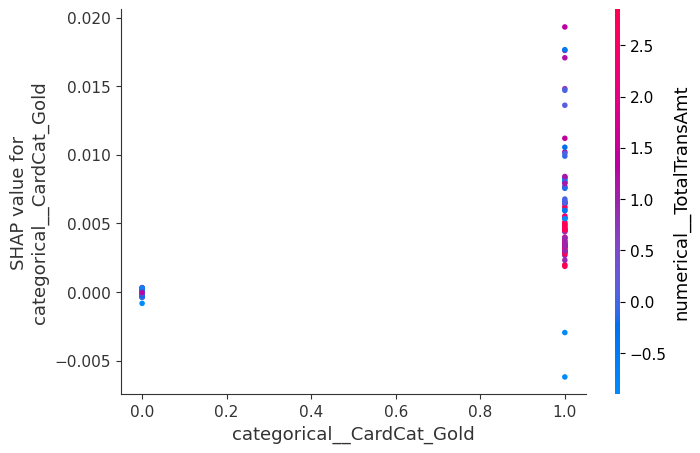

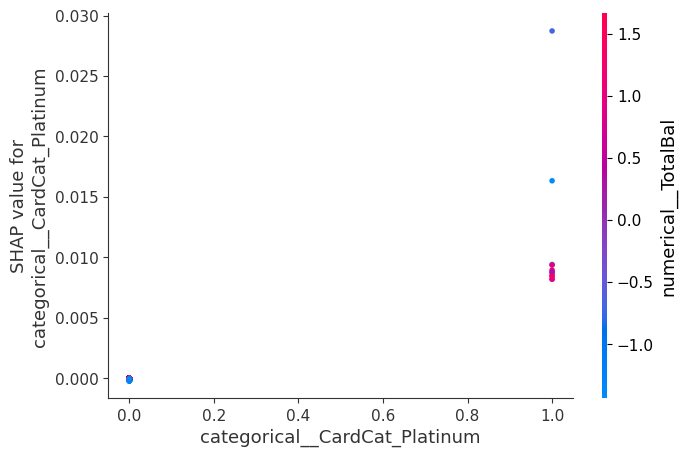

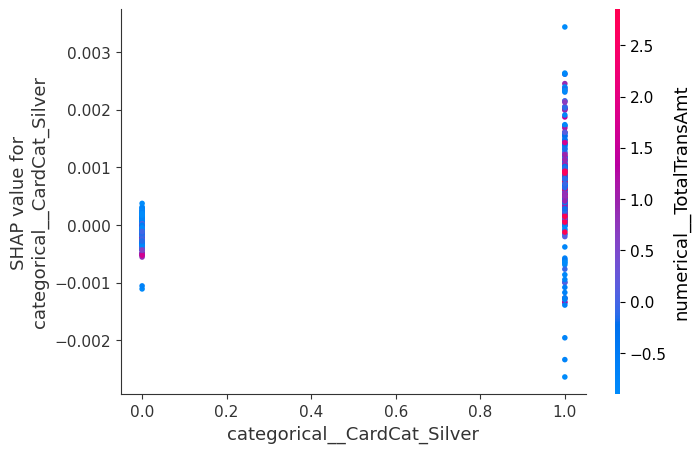

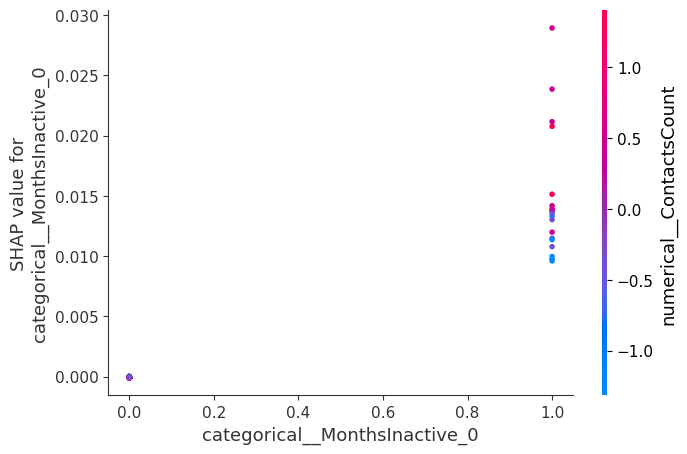

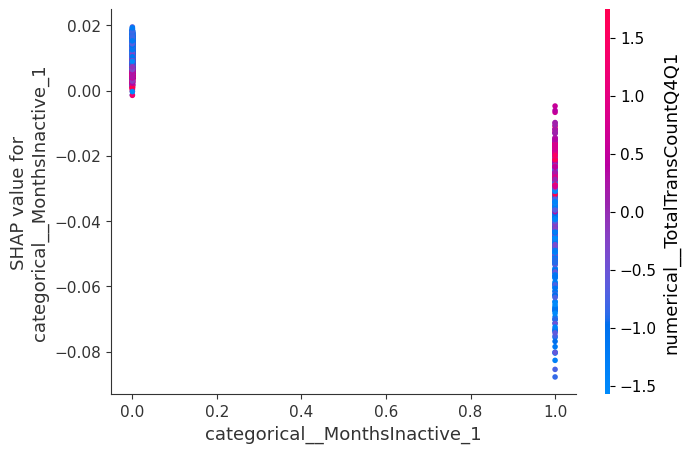

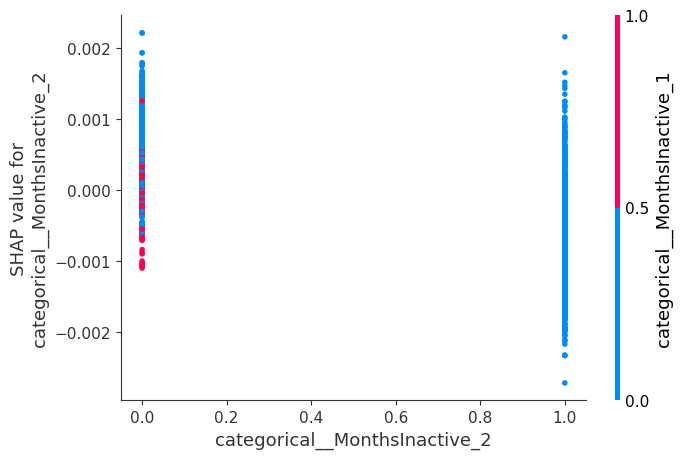

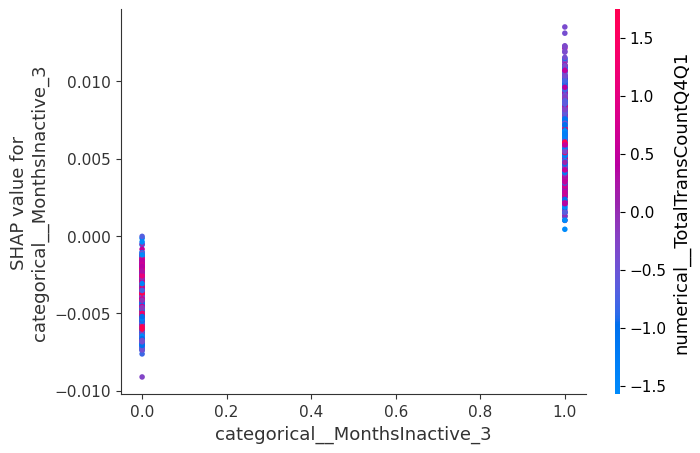

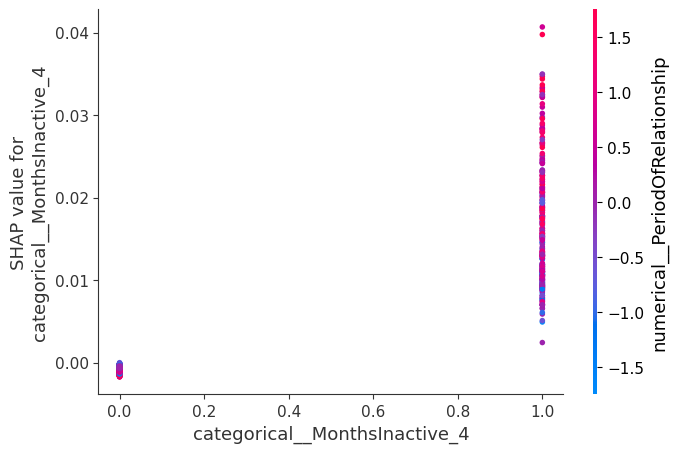

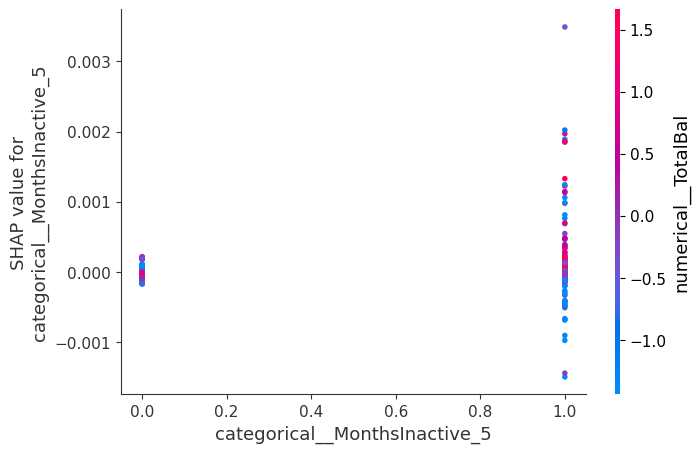

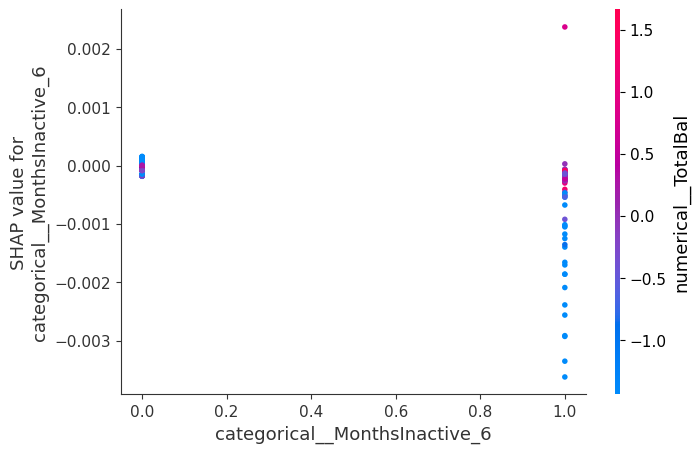

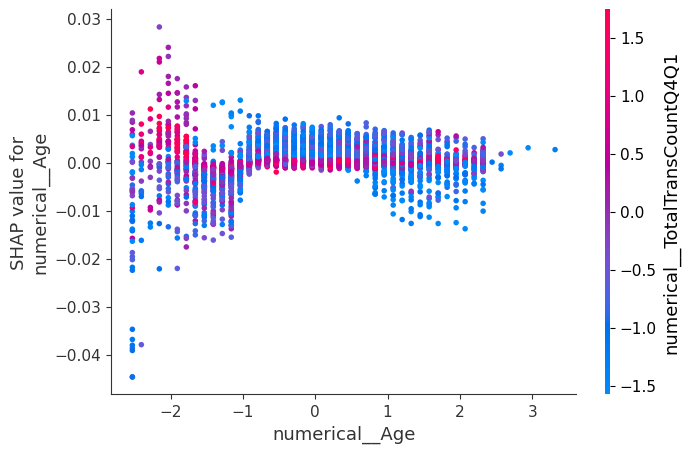

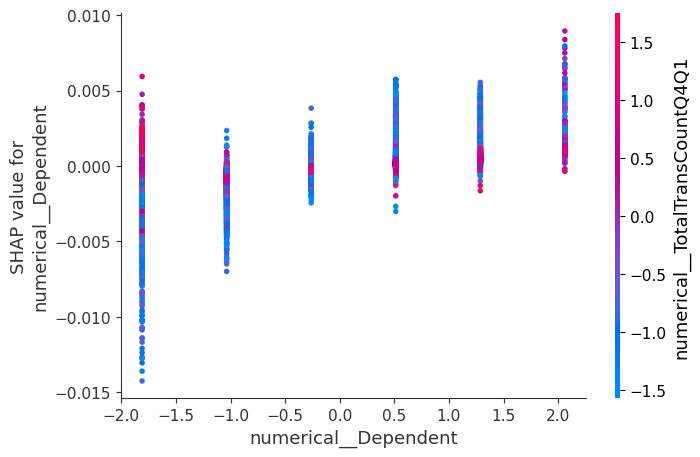

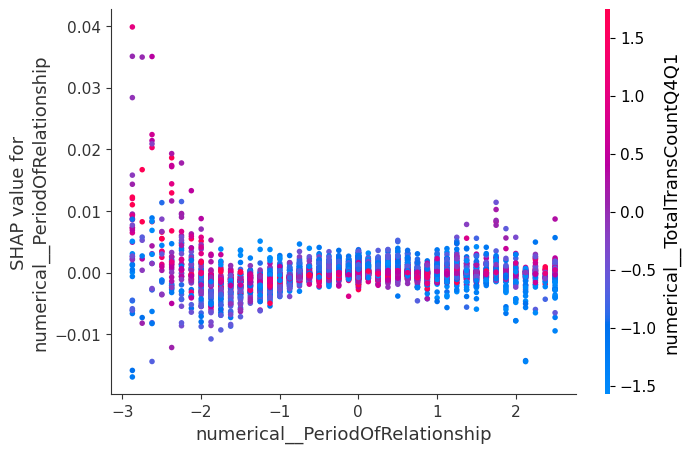

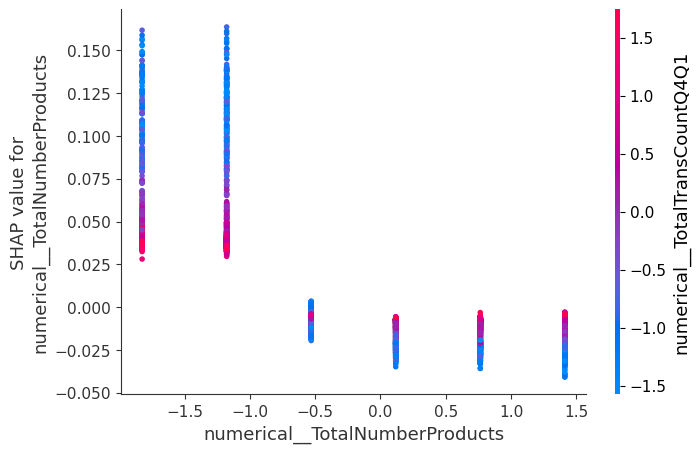

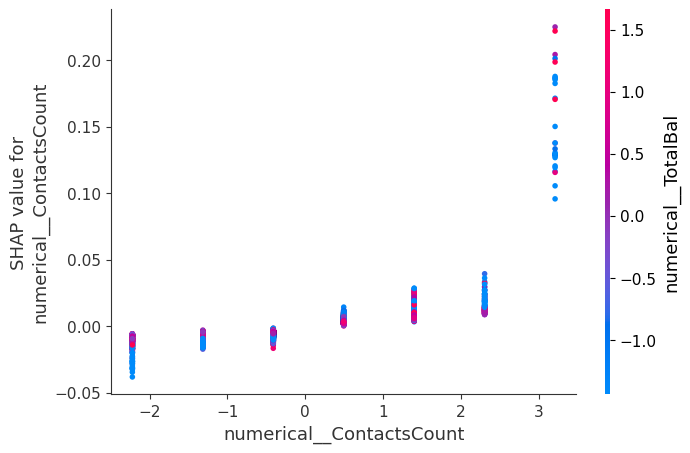

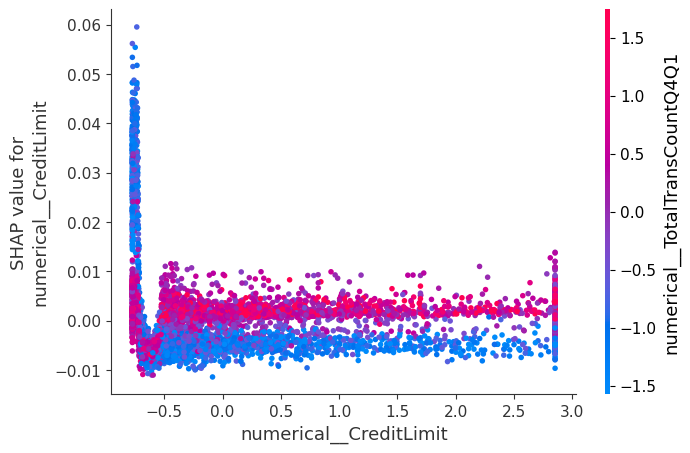

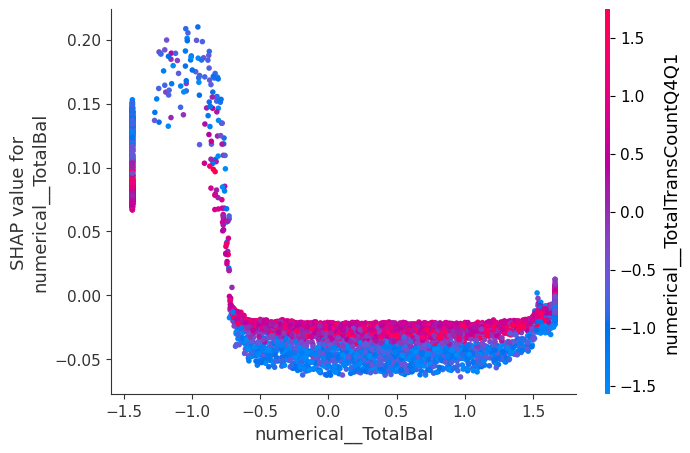

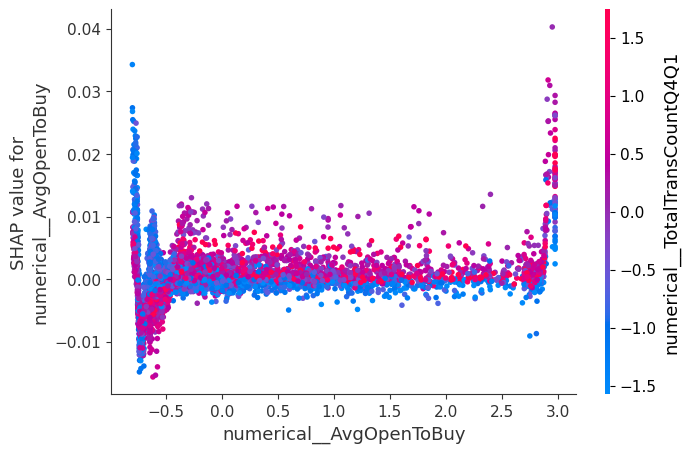

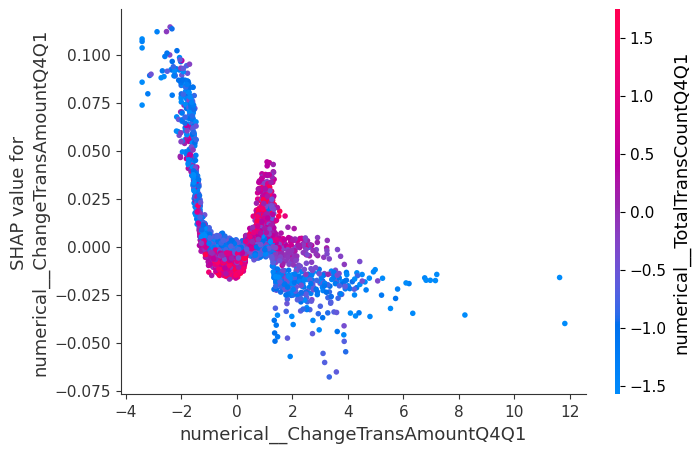

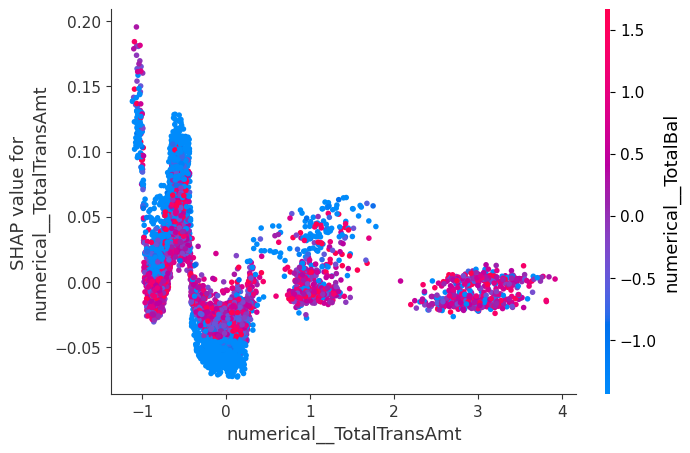

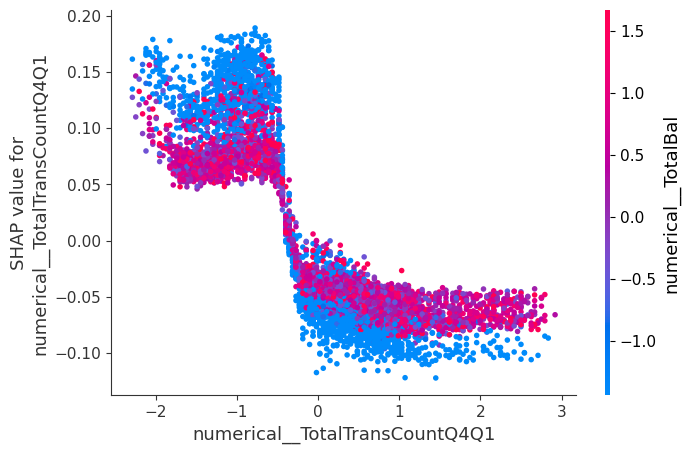

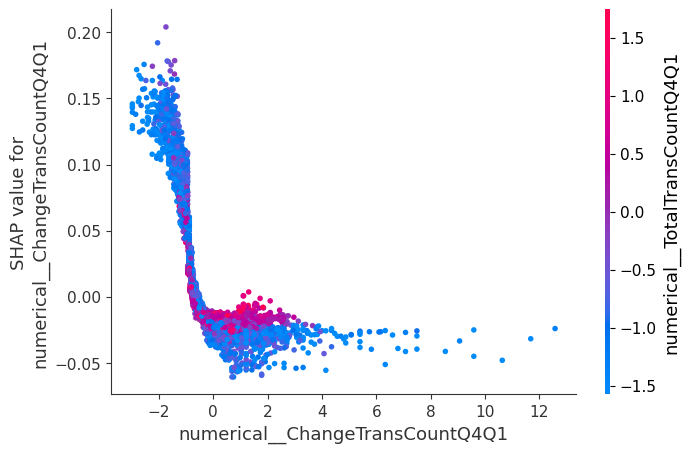

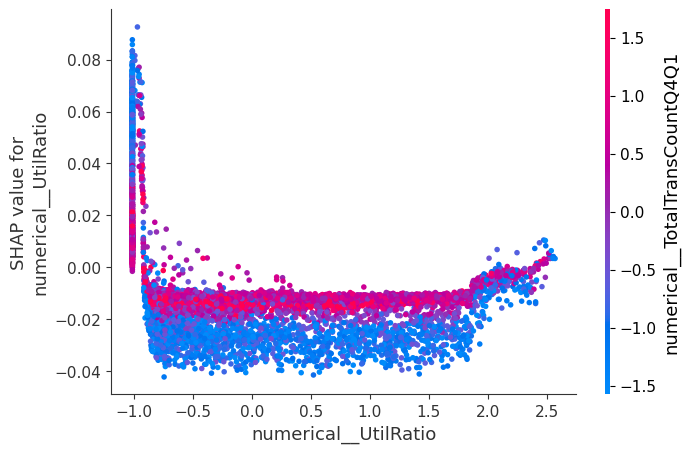

In [31]:
# Generate multiple dependence plots
for name in Xdata.columns:
     shap.dependence_plot(name, shap_values[0], Xdata)

In [32]:
exp = dx.Explainer(pipe.best_estimator_, X, y)

Preparation of a new explainer is initiated

  -> data              : 7081 rows 19 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7081 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x147908b80> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0809, mean = 0.843, max = 0.99
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.949, mean = -0.000643, max = 0.778
  -> model_info        : package sklearn

A new explainer has been created!


In [33]:
exp.model_parts().plot()

In [34]:
exp.model_profile().plot()

Calculating ceteris paribus: 100%|███████████████████████████████████████████████████████████| 19/19 [00:02<00:00,  9.10it/s]


In [35]:
exp.model_performance(model_type='classification').plot(geom='roc')

In [36]:
best_pipeline = pipe.best_estimator_

In [37]:
column_transformer = best_pipeline.named_steps['columntransformer']

In [38]:
transformed_column_names = column_transformer.get_feature_names_out()
print(transformed_column_names)

['categorical__Gender_F' 'categorical__Gender_M'
 'categorical__Education_College' 'categorical__Education_Doctorate'
 'categorical__Education_Graduate' 'categorical__Education_High School'
 'categorical__Education_Post-Graduate'
 'categorical__Education_Uneducated' 'categorical__Marital_Divorced'
 'categorical__Marital_Married' 'categorical__Marital_Single'
 'categorical__Income_$120K +' 'categorical__Income_$40K - $60K'
 'categorical__Income_$60K - $80K' 'categorical__Income_$80K - $120K'
 'categorical__Income_Less than $40K' 'categorical__CardCat_Blue'
 'categorical__CardCat_Gold' 'categorical__CardCat_Platinum'
 'categorical__CardCat_Silver' 'categorical__MonthsInactive_0'
 'categorical__MonthsInactive_1' 'categorical__MonthsInactive_2'
 'categorical__MonthsInactive_3' 'categorical__MonthsInactive_4'
 'categorical__MonthsInactive_5' 'categorical__MonthsInactive_6'
 'numerical__Age' 'numerical__Dependent' 'numerical__PeriodOfRelationship'
 'numerical__TotalNumberProducts' 'numerical